In [696]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [697]:
df = pd.read_csv("activeff_v190_r000_reload001_filament.flock", header=3, low_memory=False, delim_whitespace=True)

In [698]:
filcols = [col for col in df.columns if col[:3] == 'fil']

In [717]:
flockstates = df[filcols]
flocksteady = flockstates[len(flockstates)//2:]
first = flockstates.iloc[:, 0]

In [705]:
def dwellTime(data, times, state=0):
    index = np.asarray(data[data==state].index)
    times.append(np.array([len(i) for i in np.split(index, np.where(np.diff(index) != 1)[0]+1) if len(i) > 0]))
def getStatsText(x):
    return "Mean: {:6.2f}\nMedian: {:6.2f}\nStd: {:6.2f}".format(
                np.mean(x), np.median(x), np.std(x))

noFlockDwellT = []
extFlockDwellT = []
intFlockDwellT = []
_ = flockstates.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
_ = flockstates.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
_ = flockstates.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
noFlockDwellT = np.concatenate(noFlockDwellT)
extFlockDwellT = np.concatenate(extFlockDwellT)
intFlockDwellT = np.concatenate(intFlockDwellT)

In [706]:
noFlockDwellT = []
extFlockDwellT = []
intFlockDwellT = []
_ = flocksteady.apply(lambda x: dwellTime(x, noFlockDwellT, 0))
_ = flocksteady.apply(lambda x: dwellTime(x, extFlockDwellT, 1))
_ = flocksteady.apply(lambda x: dwellTime(x, intFlockDwellT, 2))
noFlockDwellT = np.concatenate(noFlockDwellT)
extFlockDwellT = np.concatenate(extFlockDwellT)
intFlockDwellT = np.concatenate(intFlockDwellT)

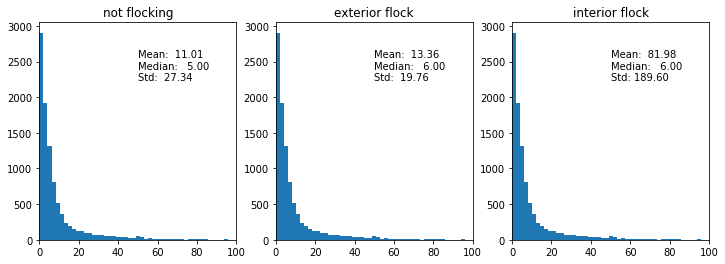

In [766]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, dt, name in zip(axes, [noFlockDwellT, extFlockDwellT, intFlockDwellT], ['not flocking', 'exterior flock', 'interior flock']):
    ax.hist(noFlockDwellT, bins=np.linspace(0, 100, 50), label=name)
    ax.set_xlim(0, 100)
    ax.set_title(name)
    ax.text(0.5, 0.8, getStatsText(dt), ha='left', va='center', transform=ax.transAxes)
plt.show()

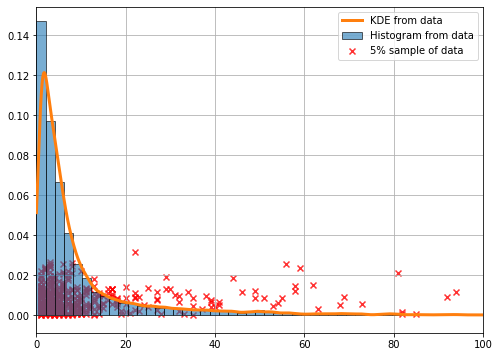

In [767]:
kde = sm.nonparametric.KDEUnivariate(noFlockDwellT)
kde.fit()
obs_dist = noFlockDwellT
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(obs_dist, bins=np.linspace(0, 100, 50), density=True, label='Histogram from data',
        zorder=5, edgecolor='k', alpha=0.6)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label='KDE from data', zorder=10)

# Plot the samples
ax.scatter(obs_dist[::20], np.abs(np.random.randn(obs_dist[::20].size))/100,
           marker='x', color='red', zorder=1, label='5% sample of data', alpha=0.8)
ax.legend(loc='best')
plt.xlim(0, 100)
ax.grid(True, zorder=100)

In [758]:
def getFreqArrays(data):
    diffs = np.diff(data)
    return np.array([len(diffs[diffs==x]) for x in [-3, -2, -1, 1, 2, 3]])

tmpdata = flocksteady.copy()
tmpdata[tmpdata==2] = 3
tmpdata = tmpdata.apply(getFreqArrays).transpose()
tmpdata.columns = ['k20', 'k21', 'k10', 'k01', 'k12', 'k02']

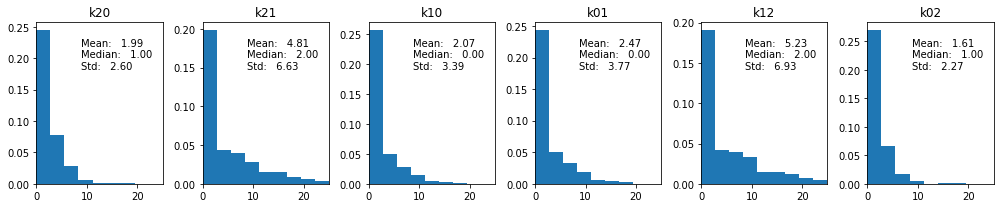

In [765]:
fig, axes = plt.subplots(1, 6, figsize=(14,3))
for ax, colname in zip(axes, tmpdata.columns):
    ax.hist(tmpdata[colname], bins=np.linspace(0, 25, 10), label=colname, density=True)
    ax.set_xlim(0, 25)
    #ax.legend(loc='best')
    ax.set_title(colname)
    ax.text(0.35, 0.8, getStatsText(tmpdata[colname]), ha='left', va='center', transform=ax.transAxes)
fig.tight_layout()
plt.show()